In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 8})

# Re-LOAD DATA

In [2]:
train = pd.read_csv('./Data/train_clean.csv') 

In [3]:
train = train.drop('Unnamed: 0', axis=1)

In [4]:
train.shape[0]

1444

In [5]:
train.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [6]:
#list(train)

## 3C. Separate the input and output variables

In [7]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_train = train.select_dtypes(include=numerics)
numlist = list(num_train)
print(list(numlist))

['level_0', 'index', 'Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'AgeWhenSold', 'YrsSinceRemodel']


In [8]:
# Remove 'SalePrice' from the numlist
numlist.remove('SalePrice')
numlist.remove('Id')

print(len(numlist),' numerical variables')
print(numlist)

40  numerical variables
['level_0', 'index', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'AgeWhenSold', 'YrsSinceRemodel']


In [9]:
cattypes = ['O']
cat_train = train.select_dtypes(include=cattypes)
catlist = list(cat_train)
print(len(catlist),' categorical variables')
print(catlist)

43  categorical variables
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [10]:
# catlist_short = ['Neighborhood','ExterQual','KitchenQual']
catlist_short = ['Neighborhood']

In [11]:
# CONCATENATE!! the numerical and categorical
inputs_vars = numlist + catlist_short
print(inputs_vars)

['level_0', 'index', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'AgeWhenSold', 'YrsSinceRemodel', 'Neighborhood']


In [12]:
## separate the input variables and output variables
PriceFeatures = train[inputs_vars].copy()
Price       = train['SalePrice']

In [13]:
### separate the input variables and output variables
#PriceFeatures = train[['OverallQual','YearBuilt','YearRemodAdd',
#             'MasVnrArea','MasVnrArea','TotalBsmtSF', 
#             '1stFlrSF','GrLivArea','FullBath',
#             'TotRmsAbvGrd','Fireplaces','GarageYrBlt',
#             'GarageCars','GarageArea','Neighborhood']].copy()
#Price       = train['SalePrice']

In [14]:
PriceFeatures

,level_0,index,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,AgeWhenSold,YrsSinceRemodel,Neighborhood
0,0,0,60,65.0,8450,7,5,2003,2003,196.0,...,0,0,0,0,0,2,2008,5,5,CollgCr
1,1,1,20,80.0,9600,6,8,1976,1976,0.0,...,0,0,0,0,0,5,2007,31,31,Veenker
2,2,2,60,68.0,11250,7,5,2001,2002,162.0,...,0,0,0,0,0,9,2008,7,6,CollgCr
3,3,3,70,60.0,9550,7,5,1915,1970,0.0,...,272,0,0,0,0,2,2006,91,36,Crawfor
4,4,4,60,84.0,14260,8,5,2000,2000,350.0,...,0,0,0,0,0,12,2008,8,8,NoRidge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,1446,1455,60,62.0,7917,6,5,1999,2000,0.0,...,0,0,0,0,0,8,2007,8,7,Gilbert
1440,1447,1456,20,85.0,13175,6,6,1978,1988,119.0,...,0,0,0,0,0,2,2010,32,22,NWAmes
1441,1448,1457,70,66.0,9042,7,9,1941,2006,0.0,...,0,0,0,0,2500,5,2010,69,4,Crawfor
1442,1449,1458,20,68.0,9717,5,6,1950,1996,0.0,...,112,0,0,0,0,4,2010,60,14,NAmes


### Handle Missing Data - Will remove this later, because I plan to handle missing data before this point

In [15]:
# Generate the boolean flags indicating missing rows and columns
missingRows = PriceFeatures.isnull().any(axis=1)
missingCols = PriceFeatures.isnull().any()
print('The columns with missingness are %s' %(PriceFeatures.columns[missingCols]))
PriceFeatures = PriceFeatures[~missingRows]  # remove rows with missingness
Price = Price[~missingRows]

The columns with missingness are Index(['GarageYrBlt'], dtype='object')


### Dummify

In [16]:
PriceFeatures.groupby(['Neighborhood']).size().sort_values(ascending=False)

Neighborhood
NAmes      218
CollgCr    147
OldTown    101
Somerst     86
Edwards     78
Gilbert     78
NridgHt     74
NWAmes      72
Sawyer      70
SawyerW     58
Crawfor     51
BrkSide     48
Mitchel     44
NoRidge     38
Timber      37
IDOTRR      29
ClearCr     27
StoneBr     22
SWISU       20
Blmngtn     17
BrDale      14
MeadowV     12
Veenker     11
NPkVill      9
Blueste      2
dtype: int64

In [17]:
dummy = pd.get_dummies(PriceFeatures['Neighborhood'], prefix='Neighborhood')
dummy

,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1440,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1441,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1442,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
dummy.drop('Neighborhood_NAmes', axis=1, inplace=True) 

In [19]:
PriceFeatures = PriceFeatures.drop('Neighborhood', axis=1)  # drop the original Neighborhood feature
PriceFeatures = pd.concat([PriceFeatures, dummy], axis=1) # concat PriceFeatures and dummy horizontally
PriceFeatures.head()

,level_0,index,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,0,0,60,65.0,8450,7,5,2003,2003,196.0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,20,80.0,9600,6,8,1976,1976,0.0,...,0,0,0,0,0,0,0,0,0,1
2,2,2,60,68.0,11250,7,5,2001,2002,162.0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,70,60.0,9550,7,5,1915,1970,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,60,84.0,14260,8,5,2000,2000,350.0,...,1,0,0,0,0,0,0,0,0,0


# Baseline Model: Linear Regression

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    PriceFeatures, Price, test_size=0.2, 
    random_state=0)

R^2 for train is equal to 0.899
R^2 for test is equal to 0.570


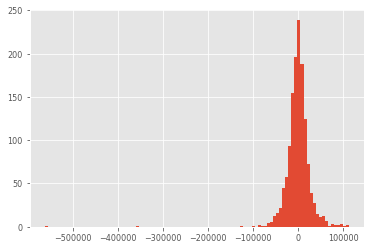

In [21]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)
residuals = Price - lm.predict(PriceFeatures)
plt.hist(residuals,bins=100);
print('R^2 for train is equal to %.3f' %(lm.score(X_train, y_train)))
print('R^2 for test is equal to %.3f' %(lm.score(X_test, y_test)))
# print('RSS is equal to %.3f' %(np.sum((lm.predict(PriceFeatures) - Price) ** 2)))
# print('The intercept is %.3f' %(lm.intercept_))
# print('The slopes are %s' %(lm.coef_))

In [22]:
pd.Series(lm.coef_, index=PriceFeatures.columns)

level_0                   157.594956
index                    -155.675939
MSSubClass               -162.451597
LotFrontage                44.087444
LotArea                     0.581624
                            ...     
Neighborhood_SawyerW     -514.014860
Neighborhood_Somerst    17346.507121
Neighborhood_StoneBr    44052.037779
Neighborhood_Timber      1300.928575
Neighborhood_Veenker    25859.412095
Length: 64, dtype: float64

In [23]:
#print('negative slope column names %s' %(PriceFeatures.columns[lm.coef_<0]))
#print('positive slope column names %s' %(PriceFeatures.columns[lm.coef_>0]))

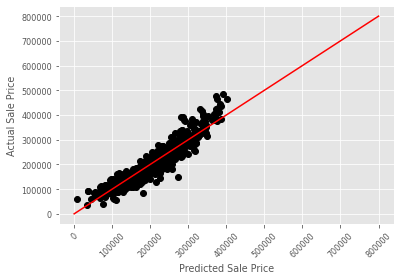

In [24]:
plt.plot(lm.predict(X_train), 
         y_train, 'ko')
x = np.linspace(0, 800000, 1000)
y = np.linspace(0, 800000, 1000)
plt.plot(x,y, 'r-')

plt.ylabel('Actual Sale Price')
plt.xlabel('Predicted Sale Price')
plt.xticks(rotation = 45); # Rotates X-Axis Ticks by 45-degrees

# Model Lasso - No Grid Search

In [25]:
from sklearn.linear_model import Lasso

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [27]:
lasso  = Lasso()
lasso.set_params(normalize=False)
lasso_scores_train = []
lasso_scores_test  = []

alphas = np.linspace(0.01, 1, 100)
coefs_lasso  = []

for alpha in alphas:
        lasso.set_params(alpha=alpha)
        lasso.fit(X_train_scaled, y_train)  
        coefs_lasso.append(lasso.coef_)
        
        lasso_scores_train.append(lasso.score(X_train_scaled, y_train))
        lasso_scores_test.append(lasso.score(X_test_scaled, y_test))

coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = PriceFeatures.columns)  
coefs_lasso.head()

/Users/flyingcape/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 249723515879.5355, tolerance: 553756000.2502564
  model = cd_fast.enet_coordinate_descent(
/Users/flyingcape/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 218237396210.8922, tolerance: 553756000.2502564
  model = cd_fast.enet_coordinate_descent(
/Users/flyingcape/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 185398409948.7004, tolerance: 553756000.2502564
  model = cd_fast.enet_coordinate_descent(
/Users/flyingcape/opt/anaconda3/lib/python3.8/site-package

/Users/flyingcape/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95209315028.7431, tolerance: 553756000.2502564
  model = cd_fast.enet_coordinate_descent(
/Users/flyingcape/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95211538298.24356, tolerance: 553756000.2502564
  model = cd_fast.enet_coordinate_descent(
/Users/flyingcape/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95213759799.08453, tolerance: 553756000.2502564
  model = cd_fast.enet_coordinate_descent(
/Users/flyingcape/opt/anaconda3/lib/python3.8/site-packages

/Users/flyingcape/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95273071939.88702, tolerance: 553756000.2502564
  model = cd_fast.enet_coordinate_descent(
/Users/flyingcape/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95275243930.64102, tolerance: 553756000.2502564
  model = cd_fast.enet_coordinate_descent(
/Users/flyingcape/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95277414153.51505, tolerance: 553756000.2502564
  model = cd_fast.enet_coordinate_descent(
/Users/flyingcape/opt/anaconda3/lib/python3.8/site-package

/Users/flyingcape/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95337462494.76321, tolerance: 553756000.2502564
  model = cd_fast.enet_coordinate_descent(
/Users/flyingcape/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95339581439.27866, tolerance: 553756000.2502564
  model = cd_fast.enet_coordinate_descent(
/Users/flyingcape/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95341698615.57516, tolerance: 553756000.2502564
  model = cd_fast.enet_coordinate_descent(
/Users/flyingcape/opt/anaconda3/lib/python3.8/site-package

,level_0,index,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0.01,482.081238,-172.096746,-6565.560326,1520.825507,5823.973499,16274.774663,7184.563806,31597.988716,6234.577070,2123.672955,...,4334.658857,8794.857031,932.373037,105.911086,-1.837926,-106.274815,4134.628244,5622.281468,213.252170,2467.709514
0.02,462.133754,-152.139927,-6565.519185,1520.809022,5823.978493,16274.763629,7184.535362,31574.001814,6228.363837,2123.657881,...,4334.581384,8794.740490,932.334258,105.880874,-1.877132,-106.341201,4134.494294,5622.215059,213.178627,2467.669694
0.03,442.186269,-132.183108,-6565.478043,1520.792537,5823.983488,16274.752594,7184.506917,31550.014913,6222.150603,2123.642807,...,4334.503911,8794.623950,932.295479,105.850662,-1.916337,-106.407587,4134.360344,5622.148651,213.105085,2467.629874
0.04,422.238785,-112.226290,-6565.436902,1520.776051,5823.988482,16274.741560,7184.478473,31526.028012,6215.937370,2123.627734,...,4334.426439,8794.507409,932.256699,105.820451,-1.955543,-106.473973,4134.226394,5622.082243,213.031543,2467.590054
0.05,402.291301,-92.269471,-6565.395760,1520.759566,5823.993476,16274.730526,7184.450028,31502.041111,6209.724136,2123.612660,...,4334.348966,8794.390869,932.217920,105.790239,-1.994748,-106.540358,4134.092443,5622.015834,212.958001,2467.550234


In [28]:
# print(alphas)

In [29]:
lasso_scores_train = np.array(lasso_scores_train) 
lasso_scores_test  = np.array(lasso_scores_test)

ValueError: zero-size array to reduction operation maximum which has no identity

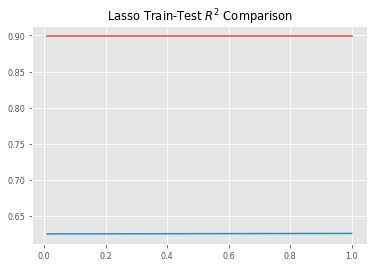

In [30]:
plt.plot(alphas, lasso_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, lasso_scores_test, label=r'$test\ R^2$')
plt.title(r'Lasso Train-Test $R^2$ Comparison')
lasso_underfit = lasso_scores_train < lasso_scores_test
last_underfit  = np.max(alphas[lasso_underfit])
plt.axvline(last_underfit, linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

Text(0, 0.5, 'slope values')

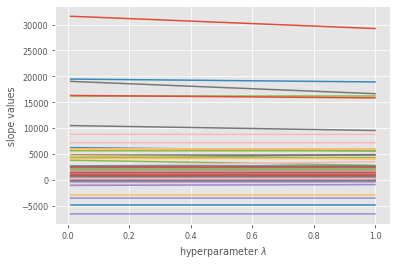

In [31]:
for name in coefs_lasso.columns:
    plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
#plt.legend(loc=1)   

# Model 2: Lasso

In [32]:
from sklearn.linear_model import Lasso

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [34]:
# Grid Search 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

skfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
lasso  = Lasso()
lasso.set_params(normalize=False)

params = {
    "alpha": [0, 5, 25, 50, 100]
}

gs = GridSearchCV(lasso, params, scoring = 'r2', cv=skfold)
gs.fit(X_train_scaled, y_train)
gs.cv_results_['mean_test_score']

/Users/flyingcape/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
/Users/flyingcape/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/flyingcape/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/flyingcape/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

array([0.86561284, 0.8657972 , 0.86665355, 0.86769347, 0.86944989])

In [35]:
gs.best_estimator_

Lasso(alpha=100)

In [36]:
# gs.best_estimator_.score

In [37]:
# print('R^2 is equal to %.3f' %(lm.score(PriceFeatures, Price)))

In [38]:
pd.Series(gs.best_estimator_.coef_, index=PriceFeatures.columns)

level_0                  155.504090
index                      0.000000
MSSubClass             -6209.400250
LotFrontage             1374.888506
LotArea                 5721.097745
                           ...     
Neighborhood_SawyerW    -328.300230
Neighborhood_Somerst    3526.605549
Neighborhood_StoneBr    5234.520838
Neighborhood_Timber       -0.000000
Neighborhood_Veenker    2243.255340
Length: 64, dtype: float64

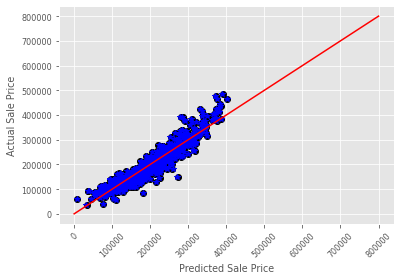

In [39]:
plt.plot(lm.predict(X_train), 
         y_train, 'ko')
plt.plot(gs.best_estimator_.predict(X_train_scaled), # new model
         y_train, 'b*')
x = np.linspace(0, 800000, 1000)
y = np.linspace(0, 800000, 1000)
plt.plot(x,y, 'r-')

plt.ylabel('Actual Sale Price')
plt.xlabel('Predicted Sale Price')
plt.xticks(rotation = 45); # Rotates X-Axis Ticks by 45-degrees

In [ ]:
#lasso  = Lasso()
#lasso.get_params().keys()

# Model 3: Random Forest

In [40]:
from sklearn import tree
tree_model = tree.DecisionTreeRegressor()

tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [41]:
tree_model.criterion

'mse'

In [42]:
tree_model.score(X_train, y_train)

1.0

In [43]:
print(tree_model.feature_importances_)

[1.26790810e-03 2.91300868e-03 2.02212509e-03 3.47932249e-03
 1.53130355e-02 6.64324289e-01 3.85761977e-03 7.26814502e-03
 3.67373188e-03 4.97901265e-03 4.70450408e-02 2.02321881e-03
 4.20912155e-03 3.37601692e-02 1.24442540e-02 9.70402135e-03
 1.09479626e-05 1.13802312e-01 5.43502650e-05 7.24898090e-05
 3.40342867e-05 7.76966469e-04 2.61570280e-03 8.90425564e-04
 1.43949716e-03 6.53368756e-03 4.15334520e-03 2.59649572e-03
 1.00550769e-02 6.96634698e-03 5.51020862e-03 2.70031413e-03
 4.35946244e-03 1.56530048e-03 0.00000000e+00 2.71007340e-05
 2.58948267e-03 1.54483773e-03 4.20675697e-03 5.87639624e-03
 2.03158070e-07 0.00000000e+00 5.64327971e-07 1.26680945e-05
 3.54507622e-05 2.00178418e-06 3.15274668e-04 1.48037770e-03
 1.44467961e-08 6.08856259e-05 0.00000000e+00 6.63148752e-05
 0.00000000e+00 3.79679859e-05 5.34734928e-05 2.54532415e-05
 1.14967603e-04 0.00000000e+00 3.16056871e-05 8.52893413e-04
 3.63156182e-05 0.00000000e+00 2.01166443e-04 6.83891690e-06]


# Model 4: Gradient Boosting

In [44]:
import sklearn.ensemble
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor()

In [45]:
gbm.fit(X_train, y_train)

GradientBoostingRegressor()

In [46]:
gbm.score(X_train, y_train)

0.9607160094846112

In [47]:
sorted_importance = sorted(zip(PriceFeatures, gbm.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance

[('OverallQual', 0.5716222338532421),
 ('GrLivArea', 0.14260491197710873),
 ('TotalBsmtSF', 0.04956125635167835),
 ('BsmtFinSF1', 0.03934396148204728),
 ('1stFlrSF', 0.02211592570104959),
 ('GarageArea', 0.019749331119639568),
 ('LotArea', 0.019399310633720773),
 ('GarageCars', 0.017056665034096957),
 ('YearBuilt', 0.01609402483364133),
 ('YrsSinceRemodel', 0.014580430018421603),
 ('AgeWhenSold', 0.012887292784051435),
 ('Fireplaces', 0.011525079025974395),
 ('2ndFlrSF', 0.011135250370620969),
 ('OverallCond', 0.009873674738108615),
 ('YearRemodAdd', 0.008623822675780017),
 ('GarageYrBlt', 0.0032248172021888803),
 ('Neighborhood_Crawfor', 0.0030580321151169963),
 ('BsmtUnfSF', 0.002943430919094446),
 ('BsmtFullBath', 0.002469640990060915),
 ('OpenPorchSF', 0.00239302114469989),
 ('WoodDeckSF', 0.002087053936729711),
 ('Neighborhood_OldTown', 0.002061884534801167),
 ('HalfBath', 0.002047884706702868),
 ('ScreenPorch', 0.0017935596636961379),
 ('Neighborhood_StoneBr', 0.00144038402758478